## Esercizio Classificazione 1

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/NLPes1.csv'

In [10]:
df = pd.read_csv(path)
df

,text,class
0,b'insane ( but inspired ) musical about alferd...,1
1,b'written by david j . schow and john shirley ...,0
2,"b'miramax "" disinvited "" on-line media from pr...",0
3,"b'in "" the astronaut\'s wife , "" charlize ther...",0
4,b'one of the 90s\' most unwelcome thriller tre...,0
...,...,...
408,"b'hav plenty , as we are told in the beginning...",0
409,b'brian de palma\'s snake eyes stars nicolas c...,0
410,b'contact ( pg ) there\'s a moment late in rob...,1
411,"b""this is a film that i was inclined to like a...",0


In [21]:
patterns = {
            r"b'": '',
            r'\d+': '',      # rimuove digits (numeri)
            r'[^\w\s]': '',  # Remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',#remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '      # rimuove tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
        df[column] = df[column].str.strip()
    return df

In [23]:
df_cleaned = clean_column(df, 'text', patterns)

In [24]:
df_cleaned.iloc[0][0]

'insane but inspired musical about alferd packer the first man ever tried for cannibalism america nas the story unfolds learn what events led packer trey parker supposedly killing and eating the five men who got lost while accompanying him through the mountains colorado search gold nthroughout packer must contend with evil trappers bent stealing his prized horse tribe ute indians that doesnt seem quite the mark and terrible winter storm that leads the eventual cannibalism nparker obviously knows his musicals very well because the viewer also treated some the most maddeningly catchy songs appear film would accomplish this again his postcannibal nmusical motion picture south park bigger longer and uncut napart from the inherent interest seeing pre south park parker and stone their first effort cannibal nalso offers some pretty decent laughs nthe aforementioned ute indian tribe that packers group encounters definite highlight are two rousing musical numbers about snowmen one which ends co

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_features=2000, min_df=0.01, max_df=0.7)
tfidfconverter = TfidfTransformer()

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df['class'], 
                                                    test_size=0.2, 
                                                    random_state=667
                                                    )

In [63]:
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train = tfidfconverter.fit_transform(X_train_vect).toarray()           # applico la trasformazione TF-IDF
print(X_train.shape, y_train.shape)

(330, 2000) (330,)


In [64]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test = tfidfconverter.transform(X_test_vect).toarray()
print(X_test.shape, y_test.shape)

(83, 2000) (83,)


In [65]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        62
           1       0.60      0.14      0.23        21

    accuracy                           0.76        83
   macro avg       0.68      0.56      0.54        83
weighted avg       0.73      0.76      0.70        83

0.543956043956044


<Axes: >

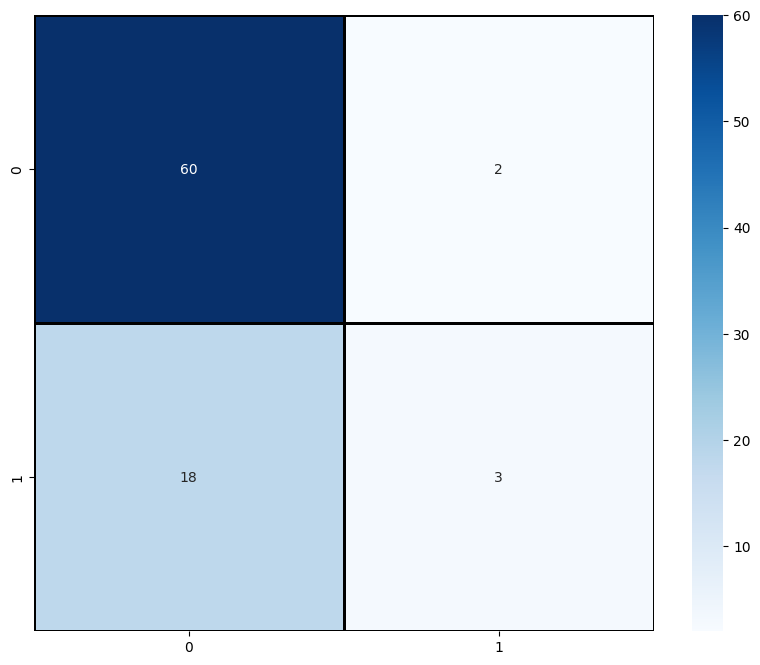

In [66]:

labels = ['Negative', 'Positive']

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='')

In [67]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7469879518072289


In [68]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.75      1.00      0.86        62
    Positive       0.00      0.00      0.00        21

    accuracy                           0.75        83
   macro avg       0.37      0.50      0.43        83
weighted avg       0.56      0.75      0.64        83



Text(95.72222222222221, 0.5, 'Actual')

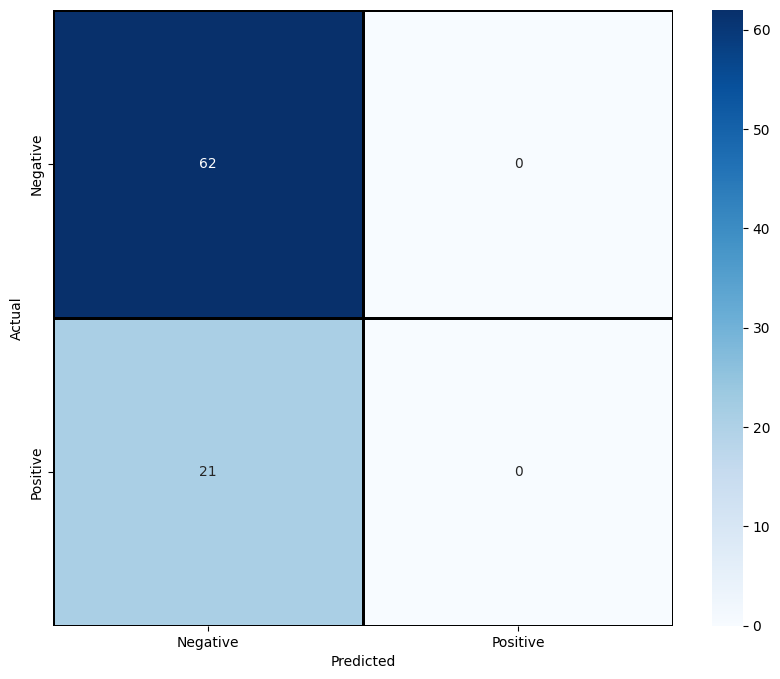

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [70]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7469879518072289
